# Evaluating logistic regression from scratch

Our second model is logistic regression. In this first example we will perform a binary classification

We will train the algorithm in the [titanic](https://www.kaggle.com/c/titanic) dataset from kaggle.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load data
df = pd.read_csv('train_file.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train_file.csv'

In [ ]:
y = df['Survived']
df.drop('Survived',inplace = True,axis = 1)

In [4]:
X = np.array(df)
y = np.array(y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 0)

# Scikit-learn Model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
scikit_model = LogisticRegression()
scikit_model.fit(X_train,y_train)

LogisticRegression()

## Evaluate and compare performance. 

We will use accuracy as metric

Logistic regression in scikit-learn will accept regularization by default (C = 1) Our model does not have regularization(yet). So keep that in mind

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
#Compute prediction in each model
pred_sklearn = scikit_model.predict(X_test)
pred_custom = custom_model.predict(X_test,theta)

#Compute the error from each model
accuracy_sklearn = accuracy_score(y_test,pred_sklearn)
accuracy_custom = accuracy_score(y_test,pred_custom)

print('Accuracy in test set from scikit-learn model:',accuracy_sklearn)
print('Accuracy in test from our custom model:',accuracy_custom)

Accuracy in test set from scikit-learn model: 0.8116591928251121
Accuracy in test from our custom model: 0.8116591928251121


The accuracy is very similar!

We accomplish a good model on test set. 

We will evaluate the models, but in the real test data. Which is basically the one that kaggle ask us to predict in the competition. We are going to make predictions using both models and upload both results to see which model wins



The data is already prepared as the training set

In [15]:
test_data = pd.read_csv('test_final.csv')
passenger_id = test_data['PassengerId']
test_data.drop('PassengerId',axis = 1,inplace= True)

In [16]:
test_arr = np.array(test_data)

In [17]:
final_pred_custom = custom_model.predict(test_arr,theta)
final_pred_scikit = scikit_model.predict(test_data)

We have the predictions in an array. We need to do some preprocess before uploading data

In [18]:
def upload_data(pred,name):
    final_pred = pd.Series(pred)
    df = pd.DataFrame(data = passenger_id)
    df['Survived'] = final_pred_custom
    return df.to_csv(name,index=False)


In [19]:
upload_data(final_pred_scikit,'scikit_pred.csv')
upload_data(final_pred_scikit,'custom_pred.csv')

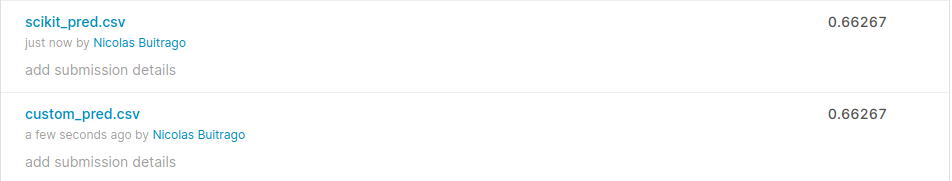

They got the same score! They work similar! 

Even though this is not a good score. But for more on titanic competition you can check my other notebook. I scored 0.77272 using random forest